In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pip install geopandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
test=pd.read_csv('/content/drive/MyDrive/Final_Hack/test.csv')
location=pd.read_csv('/content/drive/MyDrive/Final_Hack/location_details.csv')
item_id=pd.read_csv('/content/drive/MyDrive/Final_Hack/item_details.csv')
transaction_train=pd.read_csv('/content/drive/MyDrive/Final_Hack/train_transactions.csv')

In [4]:
test_merge=pd.merge(test,location,left_on='locationId',right_on='location_id',how='left')

In [6]:
test_merge.head()

,id,date,locationId,item_id,onpromotion,location_id,city,state,type,cluster
0,0,2019-01-01,location_25,item_99197,False,location_25,Kanpur,Uttar Pradesh,D,1
1,1,2019-01-01,location_25,item_103665,False,location_25,Kanpur,Uttar Pradesh,D,1
2,2,2019-01-01,location_25,item_105574,False,location_25,Kanpur,Uttar Pradesh,D,1
3,3,2019-01-01,location_25,item_105857,False,location_25,Kanpur,Uttar Pradesh,D,1
4,4,2019-01-01,location_25,item_106716,False,location_25,Kanpur,Uttar Pradesh,D,1


In [7]:
test_merge=pd.merge(test_merge,item_id,left_on='item_id',right_on='item_id',how='left')

In [8]:
test_merge.dtypes

id                   int64
date                object
locationId          object
item_id             object
onpromotion           bool
location_id         object
city                object
state               object
type                object
cluster              int64
category_of_item    object
class               object
perishable           int64
dtype: object

In [9]:
test_merge['date']=pd.to_datetime(test_merge['date'])
test_merge['locationId']=test_merge['locationId'].astype('category')
test_merge['item_id']=test_merge['item_id'].astype('category')
test_merge['onpromotion']=test_merge['onpromotion'].astype('category')
test_merge['city']=test_merge['city'].astype('category')
test_merge['state']=test_merge['state'].astype('category')
test_merge['type']=test_merge['type'].astype('category')
test_merge['cluster']=test_merge['cluster'].astype('category')
test_merge['category_of_item']=test_merge['category_of_item'].astype('category')
test_merge['class']=test_merge['class'].astype('category')
test_merge['perishable']=test_merge['perishable'].astype('category')

In [10]:
test_merge.drop('location_id',axis=1,inplace=True)

In [11]:
#prediction
pred=pd.read_csv('/content/drive/MyDrive/Final_Hack/submission_ANN_TargetEncoder_AllData.csv')

In [12]:
predictions=pd.merge(test_merge,pred,left_on='id',right_on='id',how='left')

In [13]:
predictions.dtypes

id                           int64
date                datetime64[ns]
locationId                category
item_id                   category
onpromotion               category
city                      category
state                     category
type                      category
cluster                   category
category_of_item          category
class                     category
perishable                category
unit_sales                 float64
dtype: object

In [14]:
predictions=pd.merge(predictions,item_id[['item_id','perishable']],left_on='item_id',right_on='item_id',how='left')


In [161]:
predictions.head(4)

,id,date,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable_x,unit_sales,perishable_y
0,0,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0,1.999582,0
1,1,2019-01-01,location_25,item_103665,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1,2.204405,1
2,2,2019-01-01,location_25,item_105574,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0,6.419739,0
3,3,2019-01-01,location_25,item_105857,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1092,0,2.854343,0


In [160]:
predictions.to_csv('/content/drive/MyDrive/Final_Hack/submission_result.csv')

## Cluster 14 is forecasted to have highest sales in the year 2019

In [115]:
sales_cluster=predictions.groupby(['cluster','type'])['unit_sales'].sum().sort_values(ascending=False).to_frame().reset_index()
#print('Highest Sales can be observed in cluster %d with unit sales of %f'%(sales_cluster.index[0],sales_cluster.iloc[0,0]))

sales_cluster.head()

,cluster,type,unit_sales
0,14,A,1.480909e+07
1,6,B,1.186330e+07
2,8,D,1.001325e+07
3,11,A,8.471095e+06
4,13,D,8.269585e+06


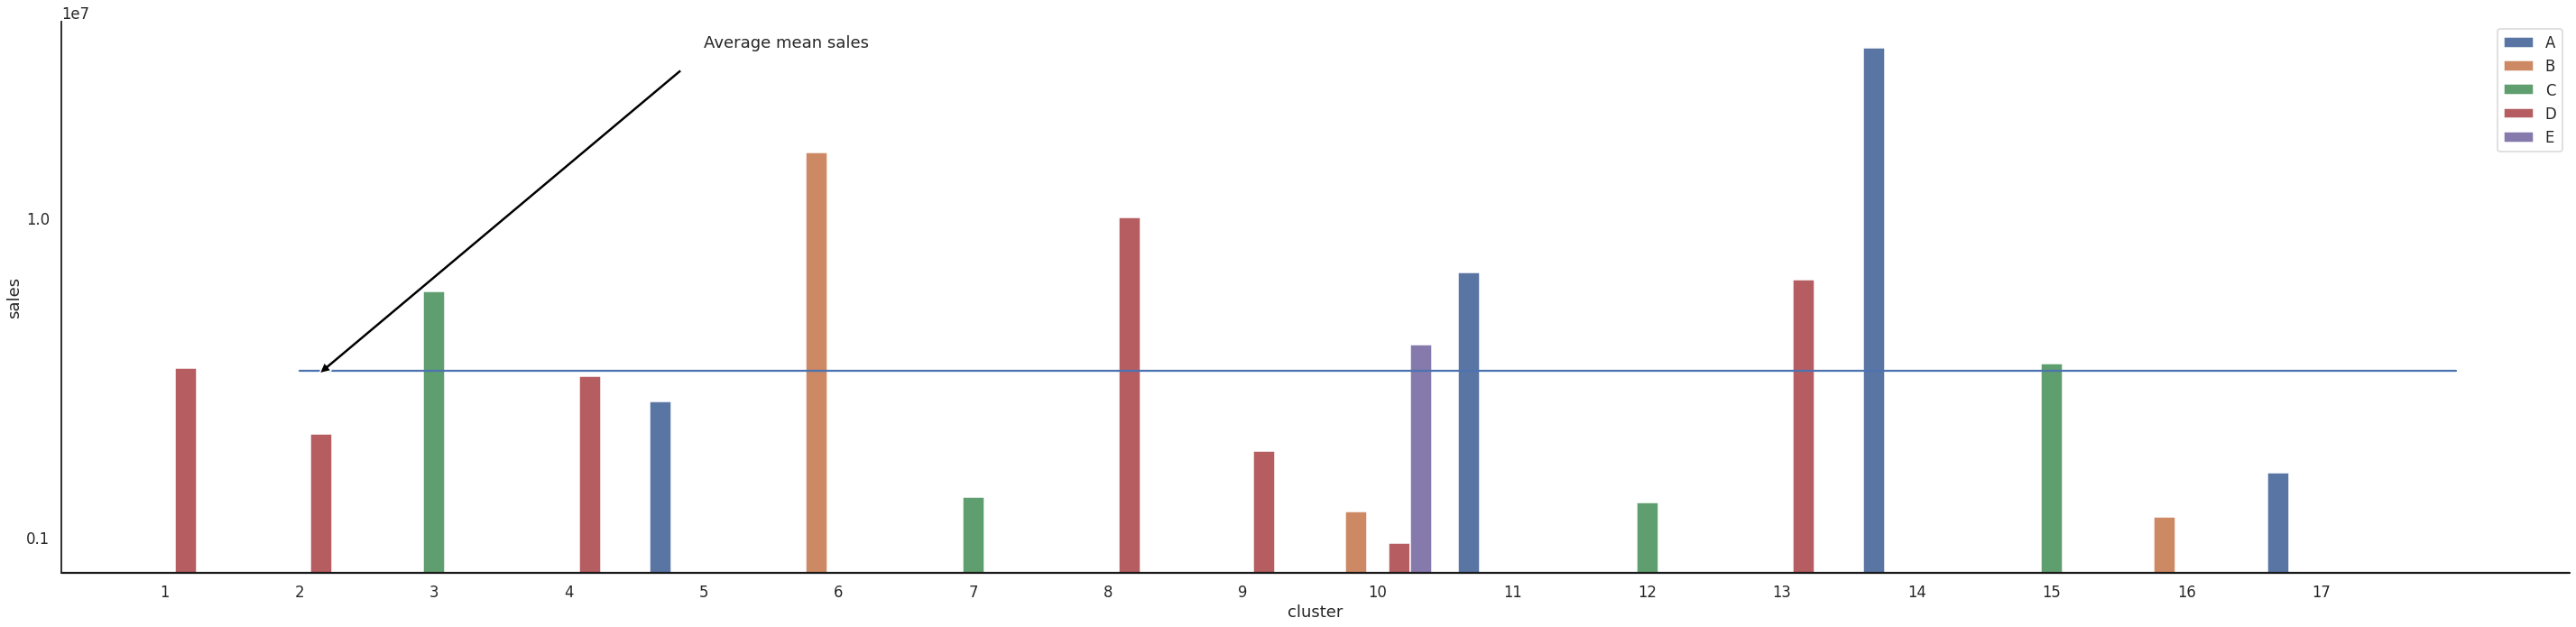

In [159]:
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")


# Set up the matplotlib figure
f, (ax) = plt.subplots(1, 1, figsize=(40, 10), sharex=True)

# Generate some sequential data
x = sales_cluster.cluster
y = sales_cluster.unit_sales
sns.barplot(x=x, y=y, hue=sales_cluster.type, ax=ax)
sns.lineplot(x=x,y=sales_cluster.unit_sales.mean(),ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("sales")
ax.annotate('Average mean sales', xy=(1, 5150000), xytext=(4, 14809085.432446),
            arrowprops=dict(facecolor='black', shrink=0.05))
# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[1000000,10000000])
plt.tight_layout(h_pad=2)


## Type D business will be having highest sales in 2019

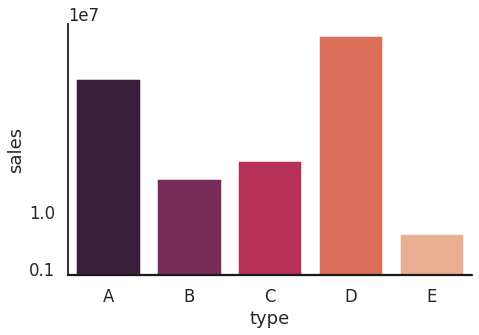

In [15]:
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")


# Set up the matplotlib figure
f, (ax) = plt.subplots(1, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = sales_type.index
y = sales_type.unit_sales
sns.barplot(x=x, y=y, palette="rocket", ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("sales")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[1000000,10000000])
plt.tight_layout(h_pad=2)

# Business units that can have highest sales

In [84]:
#Cluster with highest sales for type A
type_A=predictions.loc[predictions['type']=='A',['cluster','unit_sales']]
tA=type_A.groupby('cluster')['unit_sales'].sum().sort_values(ascending=False).to_frame()
#Cluster with highest sales for type B
type_B=predictions.loc[predictions['type']=='B',['cluster','unit_sales']]
tB=type_B.groupby('cluster')['unit_sales'].sum().sort_values(ascending=False).to_frame()
#Cluster with highest sales for type C
type_C=predictions.loc[predictions['type']=='C',['cluster','unit_sales']]
tC=type_C.groupby('cluster')['unit_sales'].sum().sort_values(ascending=False).to_frame()
#Cluster with highest sales for type D
type_D=predictions.loc[predictions['type']=='D',['cluster','unit_sales']]
tD=type_D.groupby('cluster')['unit_sales'].sum().sort_values(ascending=False).to_frame()
#Cluster with highest sales for type E
type_E=predictions.loc[predictions['type']=='E',['cluster','unit_sales']]
tE=type_E.groupby('cluster')['unit_sales'].sum().sort_values(ascending=False).to_frame()



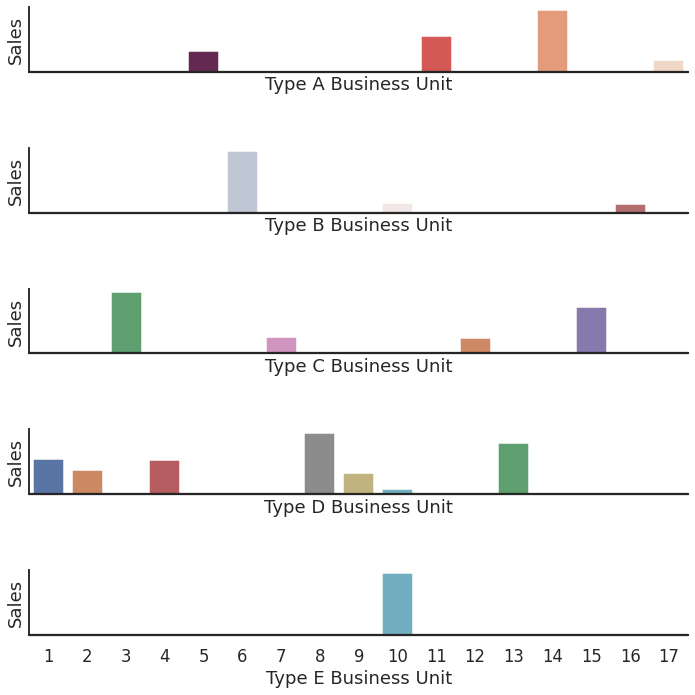

In [99]:
#Plot for each business types

sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

# Generate some sequential data
x1 = tA.index
y1 = tA.unit_sales
sns.barplot(x=x1, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sales")
ax1.set_xlabel('Type A Business Unit')

# Center the data to make it diverging
x2 = tB.index
y2 = tB.unit_sales
sns.barplot(x=x2, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Sales")
ax2.set_xlabel('Type B Business Unit')

# Randomly reorder the data to make it qualitative
x3 = tC.index
y3 = tC.unit_sales
sns.barplot(x=x3, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Sales")
ax3.set_xlabel('Type C Business Unit')

x4 = tD.index
y4 = tD.unit_sales
sns.barplot(x=x4, y=y4, palette="deep", ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("Sales")
ax4.set_xlabel('Type D Business Unit')


x5 = tE.index
y5 = tE.unit_sales
sns.barplot(x=x5, y=y5, palette="deep", ax=ax5)
ax5.axhline(0, color="k", clip_on=False)
ax5.set_ylabel("Sales")
ax5.set_xlabel('Type E Business Unit')

# Finalize the plot
sns.despine(bottom=False)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)

In [108]:
Top_clusters=pd.DataFrame({'clusters':[tA.index[0],tB.index[0],tC.index[0],tD.index[0],tE.index[0]],'unit_sales':[tA.unit_sales[0],tB.unit_sales[0],tC.unit_sales[0],tD.unit_sales[0],tE.unit_sales[0]],'type':list('ABCDE')})
Top_clusters

,clusters,unit_sales,type
0,14,1.480909e+07,A
1,6,1.186330e+07,B
2,3,7.934208e+06,C
3,8,1.001325e+07,D
4,10,6.440766e+06,E


In [150]:
item_predictions=predictions.loc[predictions['cluster']==14,['item_id','unit_sales']]
item_sales=item_predictions.groupby('item_id')['unit_sales'].sum().to_frame().sort_values('unit_sales',ascending=False)
item_sales['percentage']=(item_sales['unit_sales']/item_sales.unit_sales.sum())*100
item_sales.head(10)

,unit_sales,percentage
item_id,,
item_582864,16638.297815,0.112352
item_502331,16137.034357,0.108967
item_364606,15699.151284,0.106010
item_305080,15621.522282,0.105486
item_305229,15198.092508,0.102627
item_265559,14616.883135,0.098702
item_584028,14472.326527,0.097726
item_564533,14331.991880,0.096778
item_314384,14291.314811,0.096504


In [17]:
import mapclassify

In [63]:
predictions['state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'NCR', 'West Bengal', 'Chimborazo',
       'Gujarat', 'Madhya Pradesh', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Andhra Pradesh', 'Telangana', 'Bihar'], dtype=object)

In [18]:
import geopandas as gpd
states=gpd.read_file('/content/drive/MyDrive/Final_Hack/india_administrative_state_boundary/india_administrative_state_boundary.shp')

In [19]:
states.head()

,gid,st_nm,tid,territory_,geometry
0,1,Andaman & Nicobar Island,None,None,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,2,Arunanchal Pradesh,None,None,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,3,Assam,None,None,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,4,Bihar,None,None,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,5,Chandigarh,None,None,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [25]:
geolocations=pd.read_csv('/content/drive/MyDrive/Final_Hack/geolocations.csv')

In [26]:
geolocations['state']=geolocations['Address'].str.split(',').str[-1]

In [30]:
new_row={'Address':'Patna,Bihar','Lat':'25.5941','Long':'85.1376','state':'Bihar'}
geolocations=geolocations.append(new_row,ignore_index=True)
geolocations

,Address,Lat,Long,state
0,"Kanpur,Uttar Pradesh",26.5005,80.2712,Uttar Pradesh
1,"Bengaluru,Karnataka",12.9767,77.5753,Karnataka
2,"Delhi,NCR",28.7041,77.1025,NCR
3,"Gurgaon,Haryana",28.4697,77.0426,Haryana
4,"Mumbai,Maharashtra",19.076,72.8777,Maharashtra
5,"Mysore,Karnataka",12.2958,76.6394,Karnataka
6,"Nagpur,Maharashtra",21.1458,79.0882,Maharashtra
7,"Hyderabad,Telangana",17.385,78.4867,Telangana
8,"Surat,Gujarat",21.1702,72.8311,Gujarat
9,"Pune,Maharashtra",18.5204,73.8567,Maharashtra


In [31]:
predictions=pd.merge(predictions,geolocations,left_on='state',right_on='state',how='left')

In [ ]:
predictions['Lat']=predictions['Lat'].astype('float32')
predictions['Long']=predictions['Long'].astype('float32')
predictions.drop('Address',axis=1,inplace=True)

In [ ]:
sales_city_state=predictions.groupby(['state','city'])['unit_sales'].sum().sort_values(ascending=False).to_frame()

In [ ]:
sales_city=predictions.groupby('city')['unit_sales'].sum().sort_values(ascending=False).to_frame()